## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.322748  0.766628 -0.629324  0.170119  1.357694  0.822581
1 -0.264871  0.308788  1.197165 -0.330815  0.114243  0.320924
2 -0.065268 -0.514007  1.669543  0.485505  0.688284  0.890373
3  0.071038 -1.577555  1.539362 -1.204679 -0.537600 -1.390953
4 -0.226593  0.008337 -1.308273  0.866876 -1.423749  0.632055


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9931589	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9844628	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9736386	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9643371	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9551798	total: 60ms	remaining: 11.9s
5:	learn: 0.9442393	total: 60.6ms	remaining: 10s
6:	learn: 0.9343785	total: 61ms	remaining: 8.66s
7:	learn: 0.9257291	total: 61.6ms	remaining: 7.64s
8:	learn: 0.9169187	total: 62.2ms	remaining: 6.85s
9:	learn: 0.9089614	total: 62.6ms	remaining: 6.2s
10:	learn: 0.8997401	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8886524	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8791686	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8703609	total: 64.7ms	remaining: 4.55s
14:	learn: 0.8613872	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8526730	total: 65.8ms	remaining: 4.04s
16:	learn: 0.8441590	total: 66.3ms	remaining: 3.83s
17:	learn: 0.8350281	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8275200	total: 67.2ms	remaining: 3.47s

104:	learn: 0.3964234	total: 109ms	remaining: 926ms
105:	learn: 0.3933519	total: 109ms	remaining: 921ms
106:	learn: 0.3899726	total: 110ms	remaining: 916ms
107:	learn: 0.3871508	total: 110ms	remaining: 910ms
108:	learn: 0.3843072	total: 111ms	remaining: 904ms
109:	learn: 0.3813967	total: 111ms	remaining: 899ms
110:	learn: 0.3785744	total: 111ms	remaining: 893ms
111:	learn: 0.3756648	total: 112ms	remaining: 888ms
112:	learn: 0.3728970	total: 113ms	remaining: 884ms
113:	learn: 0.3704081	total: 113ms	remaining: 879ms
114:	learn: 0.3670002	total: 114ms	remaining: 875ms
115:	learn: 0.3641621	total: 114ms	remaining: 869ms
116:	learn: 0.3614009	total: 115ms	remaining: 866ms
117:	learn: 0.3589838	total: 115ms	remaining: 862ms
118:	learn: 0.3564843	total: 116ms	remaining: 858ms
119:	learn: 0.3537023	total: 116ms	remaining: 853ms
120:	learn: 0.3511369	total: 117ms	remaining: 849ms
121:	learn: 0.3488151	total: 117ms	remaining: 845ms
122:	learn: 0.3458470	total: 118ms	remaining: 840ms
123:	learn: 

267:	learn: 0.1266349	total: 187ms	remaining: 512ms
268:	learn: 0.1258354	total: 188ms	remaining: 511ms
269:	learn: 0.1250673	total: 189ms	remaining: 510ms
270:	learn: 0.1241885	total: 189ms	remaining: 508ms
271:	learn: 0.1232952	total: 190ms	remaining: 508ms
272:	learn: 0.1227226	total: 190ms	remaining: 506ms
273:	learn: 0.1219557	total: 191ms	remaining: 505ms
274:	learn: 0.1212696	total: 191ms	remaining: 503ms
275:	learn: 0.1205874	total: 191ms	remaining: 502ms
276:	learn: 0.1196891	total: 192ms	remaining: 501ms
277:	learn: 0.1189043	total: 193ms	remaining: 500ms
278:	learn: 0.1181393	total: 193ms	remaining: 499ms
279:	learn: 0.1174491	total: 194ms	remaining: 498ms
280:	learn: 0.1169016	total: 194ms	remaining: 497ms
281:	learn: 0.1163358	total: 195ms	remaining: 496ms
282:	learn: 0.1155773	total: 195ms	remaining: 495ms
283:	learn: 0.1146507	total: 196ms	remaining: 494ms
284:	learn: 0.1139649	total: 196ms	remaining: 493ms
285:	learn: 0.1133100	total: 197ms	remaining: 491ms
286:	learn: 

485:	learn: 0.0519045	total: 292ms	remaining: 309ms
486:	learn: 0.0515795	total: 292ms	remaining: 308ms
487:	learn: 0.0514585	total: 293ms	remaining: 307ms
488:	learn: 0.0511669	total: 293ms	remaining: 306ms
489:	learn: 0.0510642	total: 294ms	remaining: 306ms
490:	learn: 0.0509569	total: 294ms	remaining: 305ms
491:	learn: 0.0507109	total: 295ms	remaining: 304ms
492:	learn: 0.0506106	total: 295ms	remaining: 304ms
493:	learn: 0.0505118	total: 296ms	remaining: 303ms
494:	learn: 0.0503991	total: 296ms	remaining: 302ms
495:	learn: 0.0502824	total: 297ms	remaining: 302ms
496:	learn: 0.0501045	total: 297ms	remaining: 301ms
497:	learn: 0.0500080	total: 298ms	remaining: 300ms
498:	learn: 0.0498982	total: 298ms	remaining: 300ms
499:	learn: 0.0496619	total: 299ms	remaining: 299ms
500:	learn: 0.0495676	total: 299ms	remaining: 298ms
501:	learn: 0.0494746	total: 300ms	remaining: 297ms
502:	learn: 0.0493023	total: 300ms	remaining: 297ms
503:	learn: 0.0492107	total: 301ms	remaining: 296ms
504:	learn: 

647:	learn: 0.0288657	total: 371ms	remaining: 201ms
648:	learn: 0.0286873	total: 371ms	remaining: 201ms
649:	learn: 0.0286290	total: 372ms	remaining: 200ms
650:	learn: 0.0285725	total: 372ms	remaining: 199ms
651:	learn: 0.0285155	total: 373ms	remaining: 199ms
652:	learn: 0.0283423	total: 373ms	remaining: 198ms
653:	learn: 0.0282872	total: 373ms	remaining: 198ms
654:	learn: 0.0282317	total: 374ms	remaining: 197ms
655:	learn: 0.0281206	total: 374ms	remaining: 196ms
656:	learn: 0.0279532	total: 375ms	remaining: 196ms
657:	learn: 0.0278993	total: 375ms	remaining: 195ms
658:	learn: 0.0277606	total: 376ms	remaining: 194ms
659:	learn: 0.0277039	total: 376ms	remaining: 194ms
660:	learn: 0.0275425	total: 377ms	remaining: 193ms
661:	learn: 0.0274064	total: 378ms	remaining: 193ms
662:	learn: 0.0272897	total: 378ms	remaining: 192ms
663:	learn: 0.0271478	total: 379ms	remaining: 192ms
664:	learn: 0.0270181	total: 379ms	remaining: 191ms
665:	learn: 0.0269631	total: 380ms	remaining: 190ms
666:	learn: 

866:	learn: 0.0119094	total: 475ms	remaining: 72.8ms
867:	learn: 0.0118491	total: 475ms	remaining: 72.3ms
868:	learn: 0.0117946	total: 476ms	remaining: 71.7ms
869:	learn: 0.0117786	total: 476ms	remaining: 71.2ms
870:	learn: 0.0117231	total: 477ms	remaining: 70.6ms
871:	learn: 0.0116668	total: 477ms	remaining: 70.1ms
872:	learn: 0.0116089	total: 478ms	remaining: 69.5ms
873:	learn: 0.0115933	total: 478ms	remaining: 69ms
874:	learn: 0.0115394	total: 479ms	remaining: 68.4ms
875:	learn: 0.0115241	total: 479ms	remaining: 67.8ms
876:	learn: 0.0114729	total: 480ms	remaining: 67.3ms
877:	learn: 0.0114205	total: 480ms	remaining: 66.7ms
878:	learn: 0.0113693	total: 481ms	remaining: 66.2ms
879:	learn: 0.0113287	total: 481ms	remaining: 65.6ms
880:	learn: 0.0112759	total: 482ms	remaining: 65ms
881:	learn: 0.0112226	total: 482ms	remaining: 64.5ms
882:	learn: 0.0111681	total: 482ms	remaining: 63.9ms
883:	learn: 0.0111338	total: 483ms	remaining: 63.4ms
884:	learn: 0.0110822	total: 483ms	remaining: 62.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

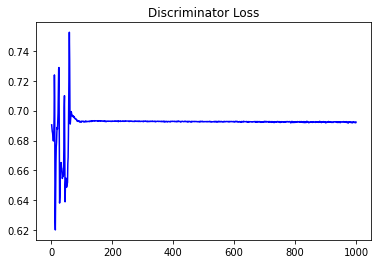

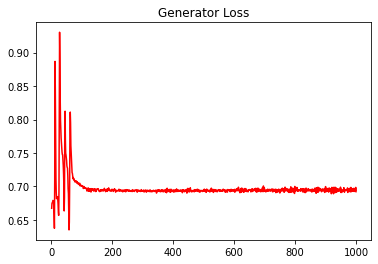

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08059723010018512


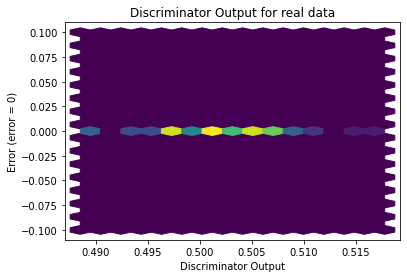

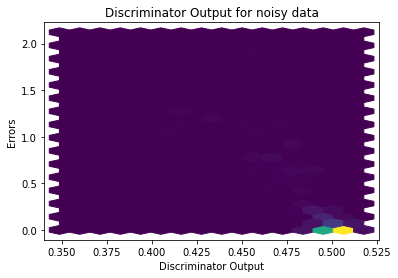

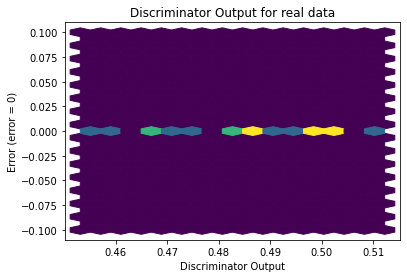

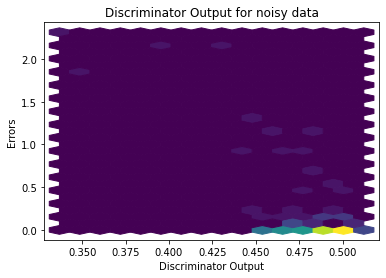

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


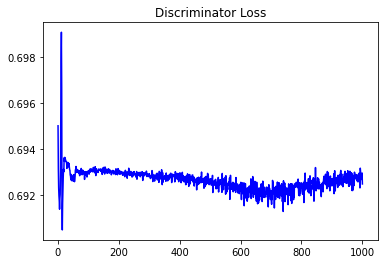

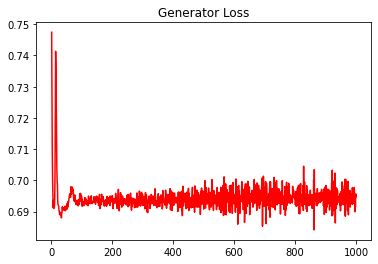

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07974756414215628


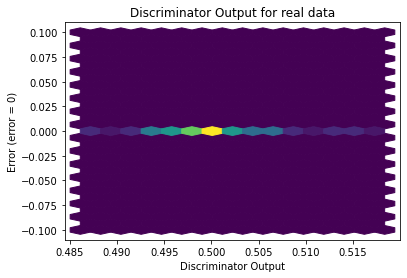

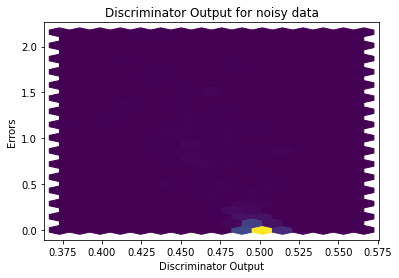

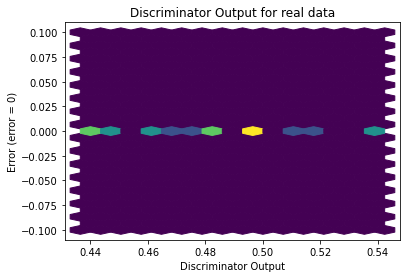

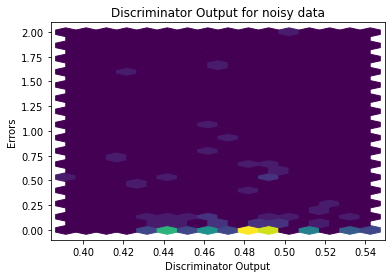

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2478]], requires_grad=True)
